# Notebook 00 - Functions and Gradients

__I thought the first notebook should be notebook 0 for a couple of reasons:__

1) I thought notebook 1 should be the first that goes over neural networks - this one just covers functions and gradients

2) Python is 0-indexed

_**kinda poetic right?**_ 

Actually the real reason is because there's 11 notebooks and the numbered emojis i used in my LinkedIn post only go from 0️⃣ to 🔟.

If there was an 11 emoji this would've been notebook 1.

**Anyways, I've wasted enough your precious time - let's jump right into the content:**


## Machine Learning

I like to define machine learning as a class of algorithms that attempt to learn rules that map inputs to outputs.

If you momentarily flashed back to elementary school maths class - yes, machine learning algorithms are essentially very large functions. Neural networks included.

__So, if machine learning models are just functions, what makes them so special? Can't we just write out the function?__

Well, we could. For example, its possible to calculate a line of best fit by hand.

But once our data can no longer be visualized on a 2D plane, once the relationship between inputs and outputs becomes non-linear, once our dataset becomes massive - finding this function by hand becomes increasingly hard.

So what makes machine learning models special is that given a set of inputs and outputs, __they can learn the function for us.__

Different machine learning algorithms use different logic to learn the function and different parameters to represent the function (for example, linear regression uses slopes and intercepts).

### Algorithms vs Models

The algorithm is the logic, the set of rules/instructions/procedures used to learn the data.

The model is the result of iteratively "training" an algorithm on a dataset, and finding the value of parameters (think slope and intercept) for the function that best maps inputs to outputs. This model can then be used to make predictions on unseen data.

### Why Neural Networks?

- They're really good at predicting things (this is a vast generalization but i'll leave this to you to look into)
- They're fun to train (especially really big ones)

But as I mentioned earlier, we won't be touching neural networks in this notebook. __Lets start with functions.__

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

Since Machine Learning algorithms are essentially very large functions (we'll go deeper into this), this is our motivation to start the discussion with functions.

We know a function typically looks something like this:

$$f(x) = 2x^2 - 3x + 4$$

Where the function $f$ takes input $x$, and produces output $f(x)$. The rule for mapping input $x$ to output $f(x)$ is the expression on the right of the equals sign.

Let's write this function in python:

In [3]:
def f(x):
    return 2*x**2 - 3*x + 4

This is what it looks like for $-6 \leq x \leq 6$:

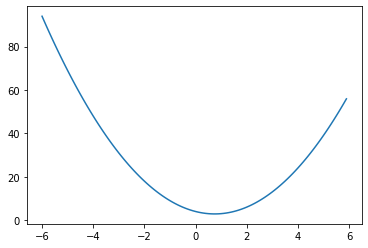

In [4]:
x = np.arange(-6, 6, step=0.1)
fx = f(x)
plt.plot(x, fx);

Here are some outputs of the function for various inputs:

In [5]:
for x in [-3, -1, 2, 4]:
    print(f'When x = {x:2}, the value of f(x) = {f(x)}')

When x = -3, the value of f(x) = 31
When x = -1, the value of f(x) = 9
When x =  2, the value of f(x) = 6
When x =  4, the value of f(x) = 24


# Gradients

Another useful thing to know about functions is the slope (or gradient) of a function.

If we revisit our primary school maths class, we'll remember slope of a line equals rise over run, where rise is the change in the vertical axis $f(x)$, and run is the change in the vertical axis $x$.

$$\text{Slope} = \frac{\text{Rise}}{\text{Run}} = \frac{\Delta f(x)}{\Delta x} $$

__This is how we were taught to do it:__

1) Pick the a value of $x$ that you want to know the slope of

2) Calculate the height of the function at that point $f(x)$.

3) Pick another value $x+h$, where $h$ is a small value, so $x+h$ is very close to $x$

4) Calculate the new height of the function at that point  $f(x+h)$.

5) Run is expressed as $\Delta x = (x+h) - x$

6) Rise is expressed as $\Delta f(x) = f(x+h) - f(x)$.

7) Divide rise by run, this is the slope!

__Here it is condensed into one equation:__

$$\text{Slope} = \frac{f(x+h) - f(x)}{(x+h) - x} =\frac{f(x+h) - f(x)}{h} $$

This gives you the slope of a straight line. Inconveniently, it's trivial to point out that not all functions, including the one above, are straight lines.

However, if you look __very very closely__ 👀, they start to look like lines.

Here's an example with the function we previously defined, but instead of looking at $-6 \leq x \leq 6$, we're looking at $1.000 \leq x \leq 1.001$

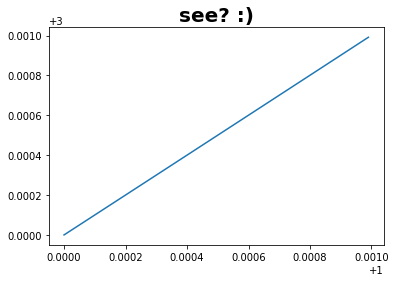

In [6]:
x = np.arange(1.000, 1.001, step=1e-5)
fx = f(x)
plt.plot(x, fx)
plt.title('see? :)', fontweight='bold', fontsize=20);

So, if we make our $h$ small enough, we can get a pretty good approximation of the slope!

Here's our calculation of the (approximate) slope of what's shown above, with $x=1.000$ and $h=0.001$

In [7]:
h = 0.001
x = 1.000
(f(x+h)-f(x))/h

1.0019999999997253

Our original function is relatively simple (compared to a neural network), so we can directly check our result by calculating the derivative of the function.

$$f(x) = 2x^2 + 3x - 4$$

Since this is a polynomial function, we can find the derivative entirely using the power rule, which states that the derivative expressions in the form of $x^n$ can be calculated as:

$$ \frac{d}{dx} x^n = n \cdot x^{n-1} $$

So, going element-wise:
- $ \frac{d}{dx} 2x^2 = 2 \cdot 2x^1 = 4x$
- $ \frac{d}{dx} -3x^1 = 1 \cdot -3x^0 = -3$
- $ \frac{d}{dx} 4 = 0$

Adding these up, we get:
$$\frac{d}{dx}f(x) = f'(x) = 4x - 3$$

And plugging in x = 1, we get $4(1) - 3 = 1$, which is pretty close to what we calculated in the cell above - but not exact.

In [17]:
def d_f(x):
    return 4*x - 3

In [18]:
d_f(1)

1

Now, let's try making our interval $h$ 10x, 100x, and 1000x smaller:

In [19]:
h = 0.001/10
x = 1.000
(f(x+h)-f(x))/h

1.000199999996454

In [20]:
h = 0.001/100
x = 1.000
(f(x+h)-f(x))/h

1.000020000008206

In [21]:
h = 0.001/1000
x = 1.000
(f(x+h)-f(x))/h

1.0000020003175791

You'll notice as $h$ gets smaller, we're getting closer and closer to the actual derivative - actually, let's just plot it.

On the horizontal axis is our decreasing step sizes $h$, and on the vertical axis is the difference between the approximate slope and the actual derivative:

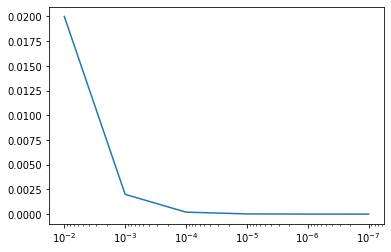

In [34]:
x = 1
h = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
dfx = (f(x+h)-f(x))/h
plt.plot(h, dfx - d_f(x))
plt.xscale('log')
plt.gca().invert_xaxis()

In fact, as we shrink $h$ towards an infinitesimally small number, we get the definition of the __gradient__ (or derivative). We can essentially think of this as the slope at any point of a curve.

$$\text{Gradient} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

Expressed differently, if we move the input variable $x$ by a little value $h$, we can expect a change in the value of $f(x)$ to be the gradient. The gradient is how changes in $x$ affects $f(x)$.

If we fast forward a bit to high school math, we express this using the following notation:

$$\frac{\partial}{\partial x} f(x) =  \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

**The gradient is the derivative of $f(x)$ with respect to $x$.** This notation is particularly important when our functions start to take more than one input, where each input has its own affect on the output. The simplest example  brings us back to something we learnt kindergarten - addition:

$$f(a, b) = a + b$$

This is a bit too trivial to use as an example though, so let's throw in multiplication too:

$$f(a, b, c) = a*b + c$$


In [75]:
def f(a, b, c):
    return a * b + c

This time, we can't plot it nicely - we would need 4 dimensions (one each for $a$, $b$, $c$, and $f(a,b,c)$).

But, our previous way of calculating gradient using small $h$ still works:

In [84]:
# pick a small h
h = 0.01

# pick some values for the inputs
a = 2.0
b = -1.0
c = 3.0

# calculate f(a,b,c)
f(a, b, c)

1.0

Now, we can estimate how changes in each variable affects the output.

In [85]:
gradient_a = (f(a+h, b, c) - f(a, b, c)) / h
gradient_a

-0.9999999999999787

In [86]:
gradient_b = (f(a, b+h, c) - f(a, b, c)) / h
gradient_b

2.0000000000000018

In [87]:
gradient_c = (f(a, b, c+h) - f(a, b, c)) / h
gradient_c

0.9999999999999787

The reason we get the trailing 0/9s and not nice whole numbers is a result the Python of not being able to nicely express very small decimal numbers in binary (0s & 1s) - this is called floating point precision error. It's also the same reason that this happens:

In [132]:
0.1 + 0.2

0.30000000000000004

But overlooking that and rounding those numbers to integers, these values make complete sense:
 - If $a$ increases from 2 to 3, it will be multiplied by -1 (the value of $b$) and change the output by -1.
 - If $b$ increases from -1 to 0, it will be multiplied by 2 (the value of $a$) and change the output by 2.
 - If $c$ increases from 3 to 4, it will obviously change the output by 1.
 
Pick some different values for $a$, $b$, $c$ and observe how the gradients change for yourself. You'll notice that:
 - The gradient of $a$ is always $b$, or $\frac{\partial f(a, b, c)}{\partial a} = b$
 - The gradient of $b$ is always $a$, or $\frac{\partial f(a, b, c)}{\partial b} = a$
 - The gradient of $c$ is always $1$, or $\frac{\partial f(a, b, c)}{\partial c} = 1$

**Revisiting our original function**
$$f(a, b, c) = a * b + c$$

Although this example was pretty straightforward, calculating derivatives of functions with multiple (more than 2) variables can get complicated.

Luckily, if we recall order of operations, we need not calculate everything at once - we can calculate one thing at a time, dealing with 2 inputs and 1 operation at each step. In this case:

Step 1) Calculate $a*b = 2 * -1 = -2$

Step 2) Add $c$ to get $(a*b) + c = -2 + 3 = 1$

Once we break it down like this, our observations make sense:

- $\frac{d}{da} (a\cdot b) = ((1\cdot a^0) \cdot b) = b$
- $\frac{d}{db} (a\cdot b) = (a \cdot (1\cdot b^0)) = a$
- $\frac{d}{dc} ((a \cdot b) + c) = (0 + (1\cdot c^0)) = 1$

# Wrapping Up

In hopes of keeping each notebook relatively short and digestible we'll end the discussion on functions and gradients here. You might be asking why we spent a whole notebook deriving derivatives (lol), you might be thinking there's no way a neural network uses this "tiny $h$" approach right? And you would be correct.

But we went the long way because I think an intuitive and fundamental understanding of gradients is pretty important to understanding neural networks.

__Here are the main takeaways:__
1) The gradient is how changes in an input variable affects the output.

2) We can break down complex functions into smaller parts and "chain" them together.